<center>

# EDA - LOS ANGELES CRIME

</center>

## Import libraries

In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [80]:
total_data = pd.read_csv("../data/raw/crime_query.csv")

## Exploration and data cleaning

In [ ]:
total_data.head(5)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,10304468,2020-01-08T00:00:00.000,2020-01-08T00:00:00.000,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02T00:00:00.000,2020-01-01T00:00:00.000,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14T00:00:00.000,2020-02-13T00:00:00.000,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [81]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764061 entries, 0 to 764060
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dr_no           764061 non-null  int64  
 1   date_rptd       764061 non-null  object 
 2   date_occ        764061 non-null  object 
 3   time_occ        764061 non-null  int64  
 4   area            764061 non-null  int64  
 5   area_name       764061 non-null  object 
 6   rpt_dist_no     764061 non-null  int64  
 7   part_1_2        764061 non-null  int64  
 8   crm_cd          764061 non-null  int64  
 9   crm_cd_desc     764061 non-null  object 
 10  mocodes         662300 non-null  object 
 11  vict_age        764061 non-null  int64  
 12  vict_sex        669514 non-null  object 
 13  vict_descent    669503 non-null  object 
 14  premis_cd       764041 non-null  float64
 15  premis_desc     763579 non-null  object 
 16  weapon_used_cd  263469 non-null  float64
 17  weapon_des

### Count and eliminate duplicates

In [82]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

171895

In [83]:
total_data.drop_duplicates(inplace= True)
total_data.shape

(592166, 28)

In [84]:
total_data.head(2)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,10304468,2020-01-08T00:00:00.000,2020-01-08T00:00:00.000,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02T00:00:00.000,2020-01-01T00:00:00.000,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545


In [85]:
# Cambiar el tipo de date_occ a datetime
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"]).dt.date 
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

# Cambiar el tipo de date_rptd a datetime
total_data["date_rptd"] = pd.to_datetime(total_data["date_rptd"]).dt.date
total_data["date_rptd"] = pd.to_datetime(total_data["date_rptd"])

# Cambiar el tipo de time_occ a object
total_data["time_occ"] = pd.to_datetime(total_data["time_occ"].astype(str), format="%H%M", errors="coerce").dt.time
total_data.head(5)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,10304468,2020-01-08,2020-01-08,22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [86]:
total_data["weekday"] = total_data["date_occ"].dt.dayofweek.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [87]:
total_data.head(2)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,weekday
0,10304468,2020-01-08,2020-01-08,22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,Wednesday
1,190101086,2020-01-02,2020-01-01,03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,Wednesday


In [88]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592166 entries, 0 to 764060
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dr_no           592166 non-null  int64         
 1   date_rptd       592166 non-null  datetime64[ns]
 2   date_occ        592166 non-null  datetime64[ns]
 3   time_occ        579595 non-null  object        
 4   area            592166 non-null  int64         
 5   area_name       592166 non-null  object        
 6   rpt_dist_no     592166 non-null  int64         
 7   part_1_2        592166 non-null  int64         
 8   crm_cd          592166 non-null  int64         
 9   crm_cd_desc     592166 non-null  object        
 10  mocodes         515210 non-null  object        
 11  vict_age        592166 non-null  int64         
 12  vict_sex        521042 non-null  object        
 13  vict_descent    521035 non-null  object        
 14  premis_cd       592148 non-null  float64 

## Eliminate irrelevant information

In [89]:
total_data["date_occ"].dt.year.value_counts()

date_occ
2023    228067
2021    106521
2011     98252
2010     58825
2022     56133
2020     44368
Name: count, dtype: int64

In [90]:
total_data = total_data.loc[(total_data["date_occ"].dt.year != 2010) & (total_data["date_occ"].dt.year != 2011)]

In [91]:
total_data["date_occ"].dt.year.value_counts()

date_occ
2023    228067
2021    106521
2022     56133
2020     44368
Name: count, dtype: int64

In [92]:
total_data.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat',
       'lon', 'weekday'],
      dtype='object')

In [93]:
drop_columns = ['dr_no', 'date_rptd', 'area',
       'part_1_2', 'crm_cd', 'premis_cd', 'weapon_used_cd', 'status', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'cross_street']

In [94]:
total_data.drop(drop_columns, axis=1, inplace=True)
total_data.head(2)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday
0,2020-01-08,22:30:00,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978,Wednesday
1,2020-01-01,03:30:00,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,Wednesday


In [95]:
columns = total_data.columns
columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon', 'weekday'],
      dtype='object')

## Analysis of univariate variables

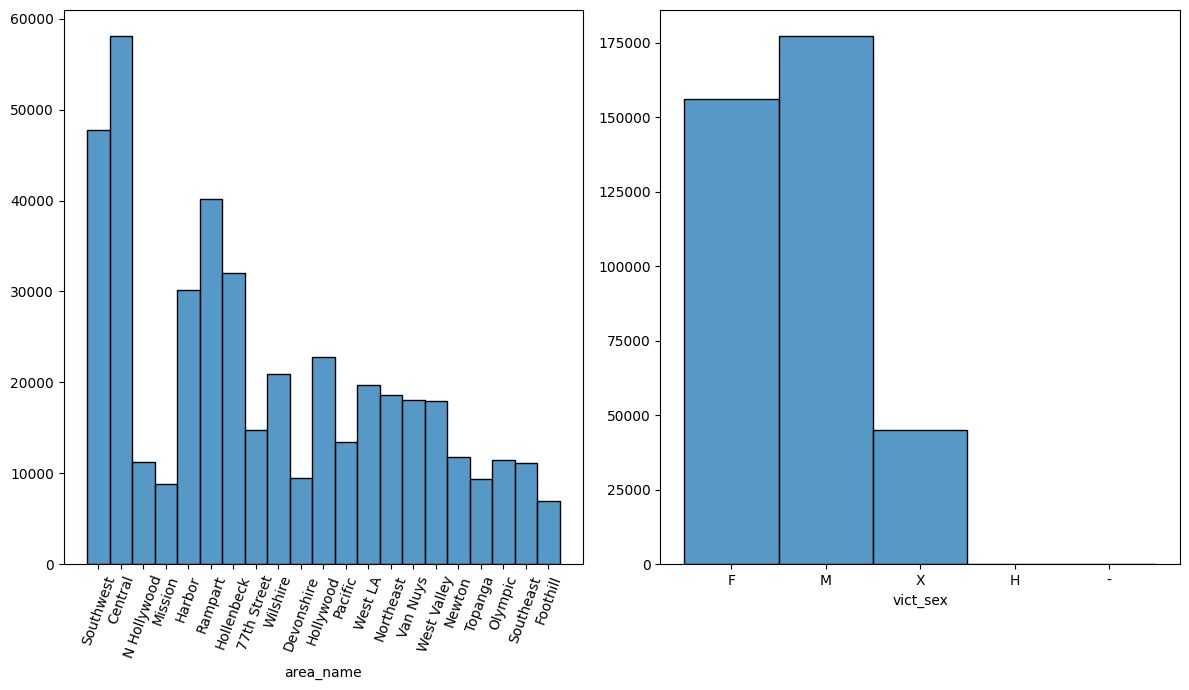

In [96]:
fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)

sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

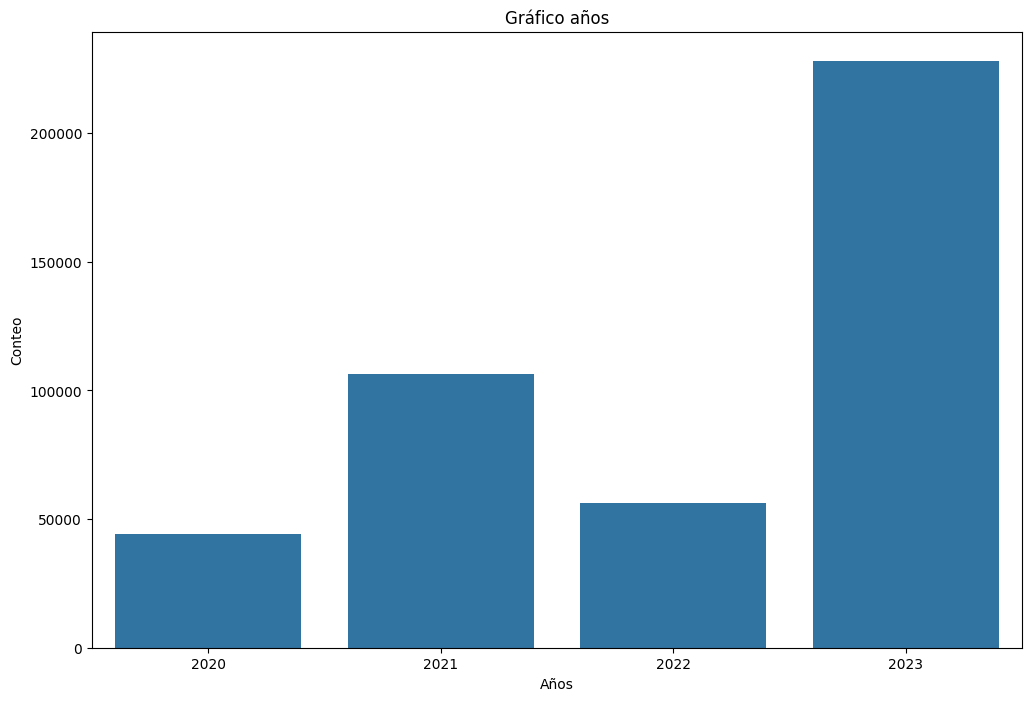

In [97]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

In [98]:
delitos=total_data.value_counts("crm_cd_desc")[0:20]
delitos=pd.DataFrame(delitos)
delitos

,count
crm_cd_desc,
VEHICLE - STOLEN,46010
BATTERY - SIMPLE ASSAULT,37114
BURGLARY FROM VEHICLE,28211
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27159
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25731
BURGLARY,24850
THEFT OF IDENTITY,22780
THEFT PLAIN - PETTY ($950 & UNDER),22118
INTIMATE PARTNER - SIMPLE ASSAULT,21098


C:\Users\luisf\AppData\Local\Temp\ipykernel_10724\406058030.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


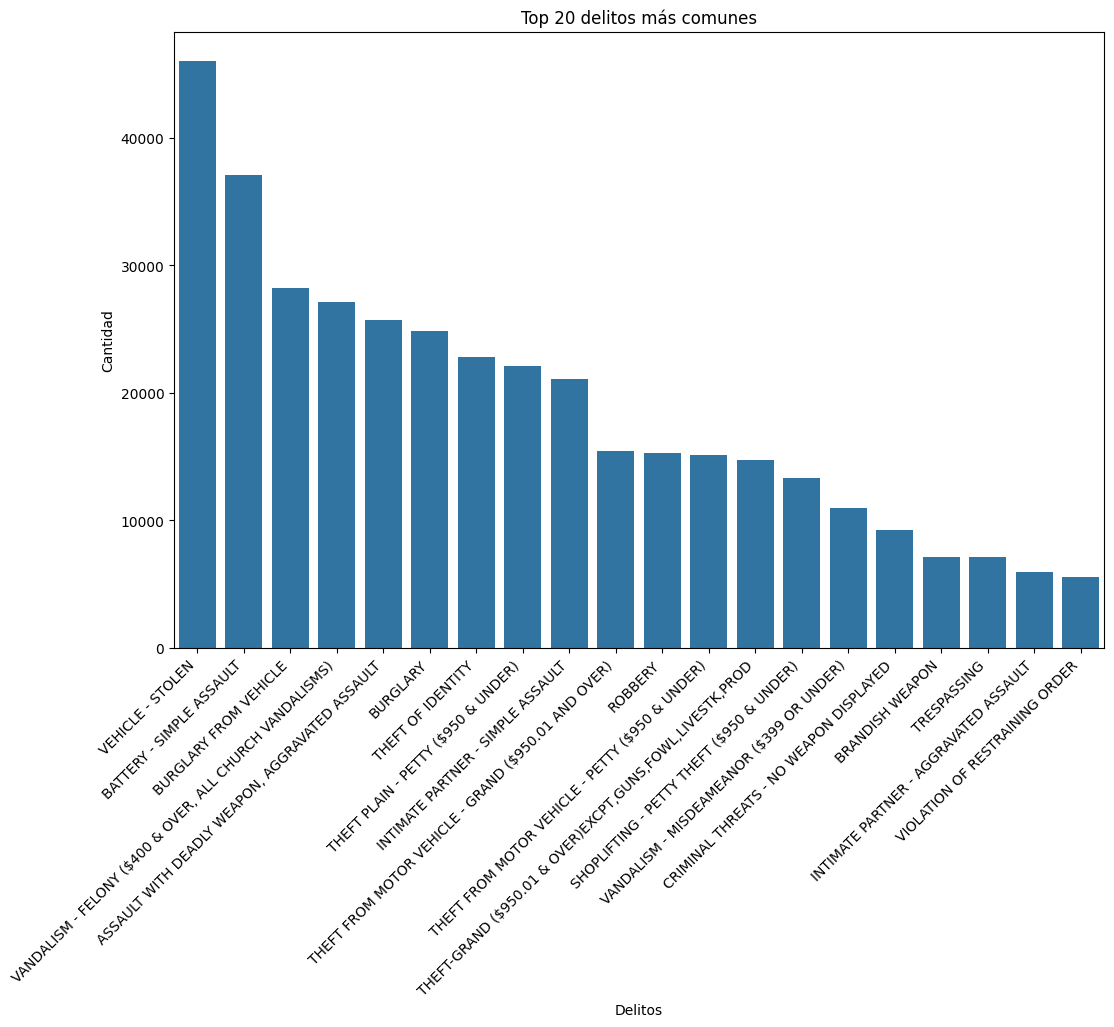

In [99]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Configurar etiquetas y título
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Top 20 delitos más comunes')

# Mostrar el gráfico
plt.show()

In [100]:
hours=total_data.value_counts("time_occ")[0:20]
hours=pd.DataFrame(hours)
hours

,count
time_occ,
20:00:00,14670
12:00:00,13895
10:00:00,12081
18:00:00,11357
17:00:00,10609
22:00:00,10256
21:00:00,9827
19:00:00,9753
23:00:00,9510


In [101]:
hours=hours.sort_index()

C:\Users\luisf\AppData\Local\Temp\ipykernel_10724\537459520.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


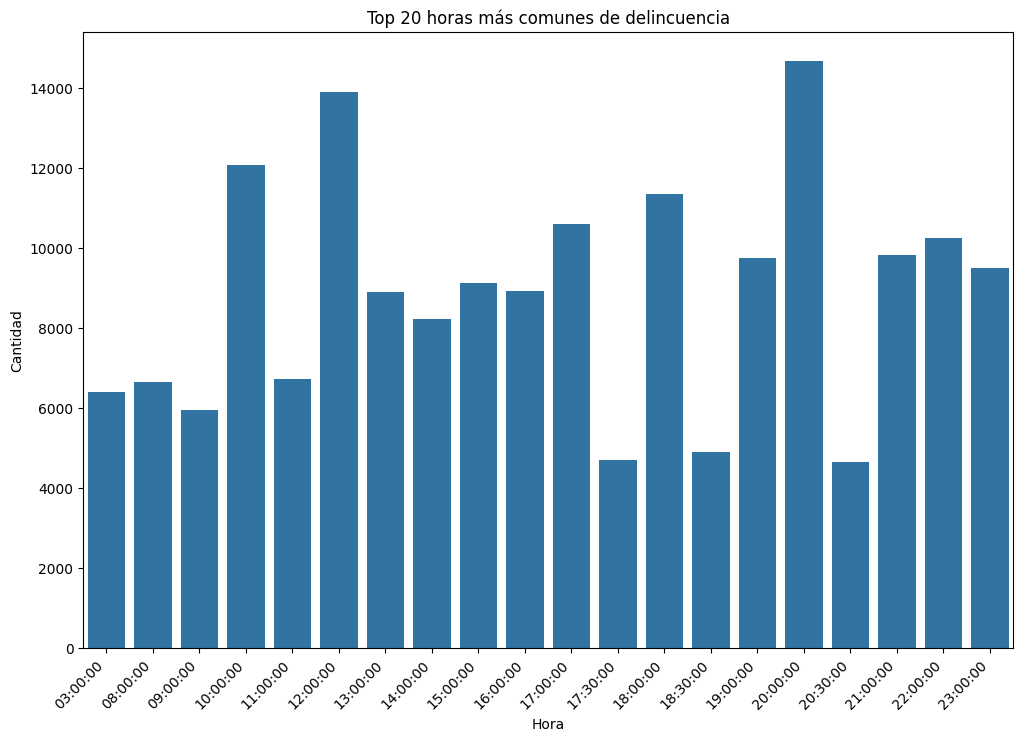

In [102]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['count'], data=hours)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Configurar etiquetas y título
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Top 20 horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [103]:
rpt_codes=total_data.value_counts("rpt_dist_no")[0:20]
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes

,count
rpt_dist_no,
162,4556
182,4032
111,3305
152,2617
153,2549
119,2521
245,2300
185,2289
363,2284


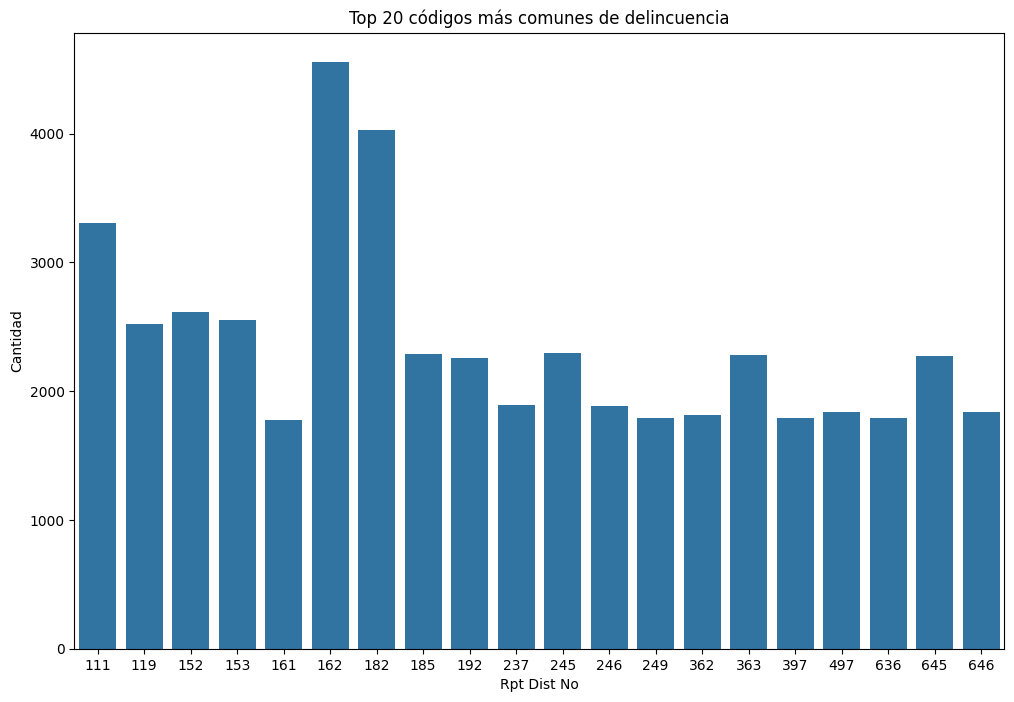

In [104]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Configurar etiquetas y título
plt.xlabel('Rpt Dist No')
plt.ylabel('Cantidad')
plt.title('Top 20 códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [105]:
premis_desc=total_data.value_counts("premis_desc")[0:20]
premis_desc=pd.DataFrame(premis_desc)
premis_desc

,count
premis_desc,
STREET,111852
SINGLE FAMILY DWELLING,62744
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",57383
PARKING LOT,29219
OTHER BUSINESS,21676
SIDEWALK,21456
"VEHICLE, PASSENGER/TRUCK",13366
GARAGE/CARPORT,7225
DEPARTMENT STORE,6600


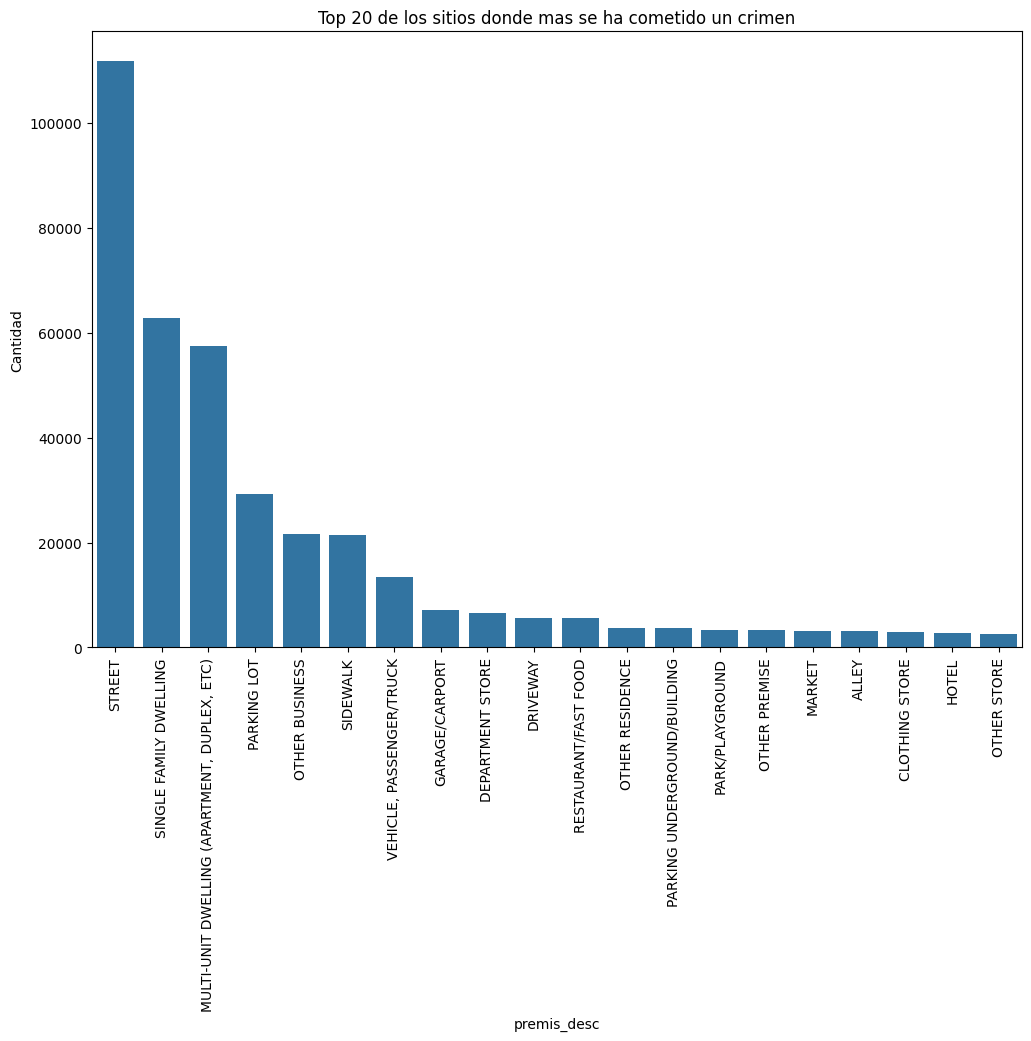

In [106]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=premis_desc.index, y=premis_desc['count'], data=premis_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('premis_desc')
plt.ylabel('Cantidad')
plt.title('Top 20 de los sitios donde mas se ha cometido un crimen')

# Mostrar el gráfico
plt.show()

In [129]:
weapon_desc=total_data.value_counts("weapon_desc").head(20)
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82664
UNKNOWN WEAPON/OTHER WEAPON,17634
VERBAL THREAT,11308
HAND GUN,9781
KNIFE WITH BLADE 6INCHES OR LESS,3374
OTHER KNIFE,3173
SEMI-AUTOMATIC PISTOL,2983
UNKNOWN FIREARM,2918
MACE/PEPPER SPRAY,1940


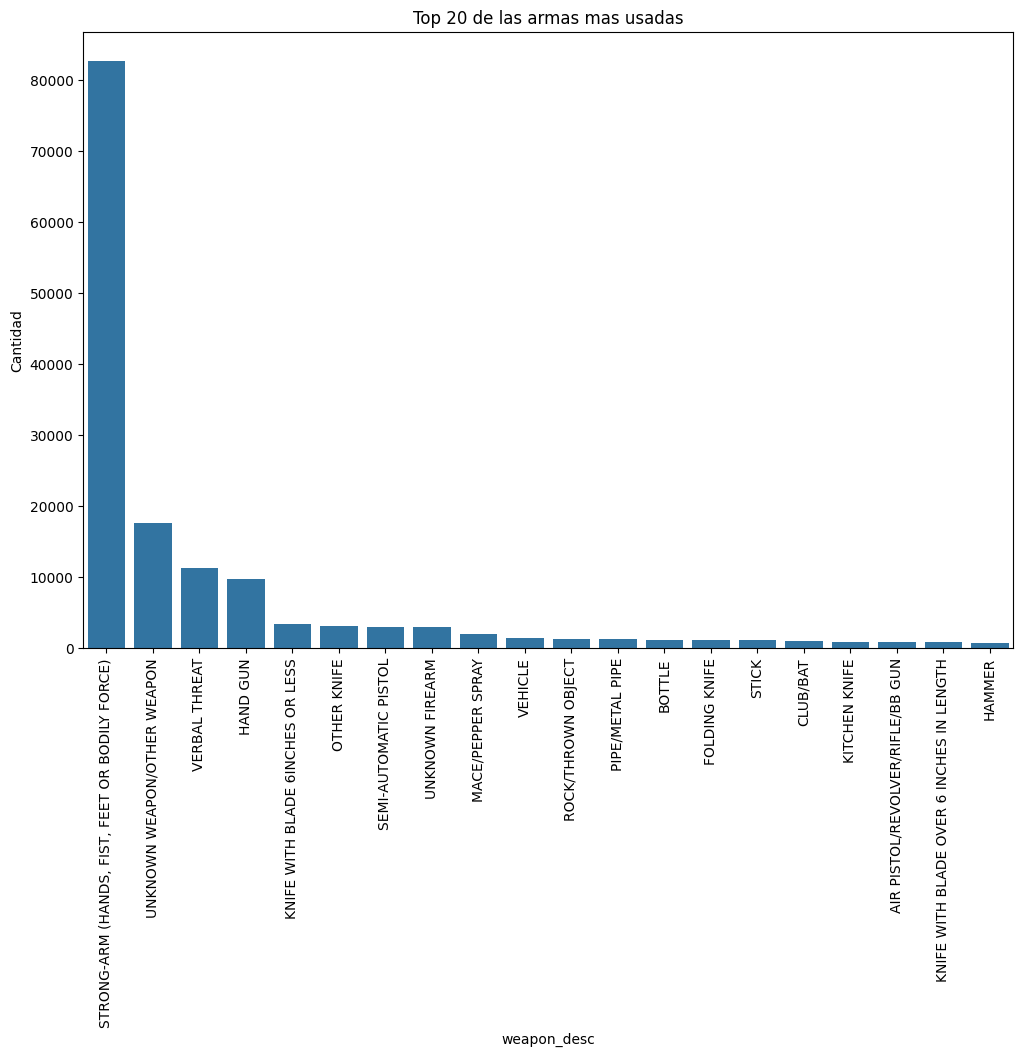

In [133]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('Top 20 de las armas mas usadas')

# Mostrar el gráfico
plt.show()

In [109]:
total_data["Weapon"] = total_data["weapon_desc"].isnull()

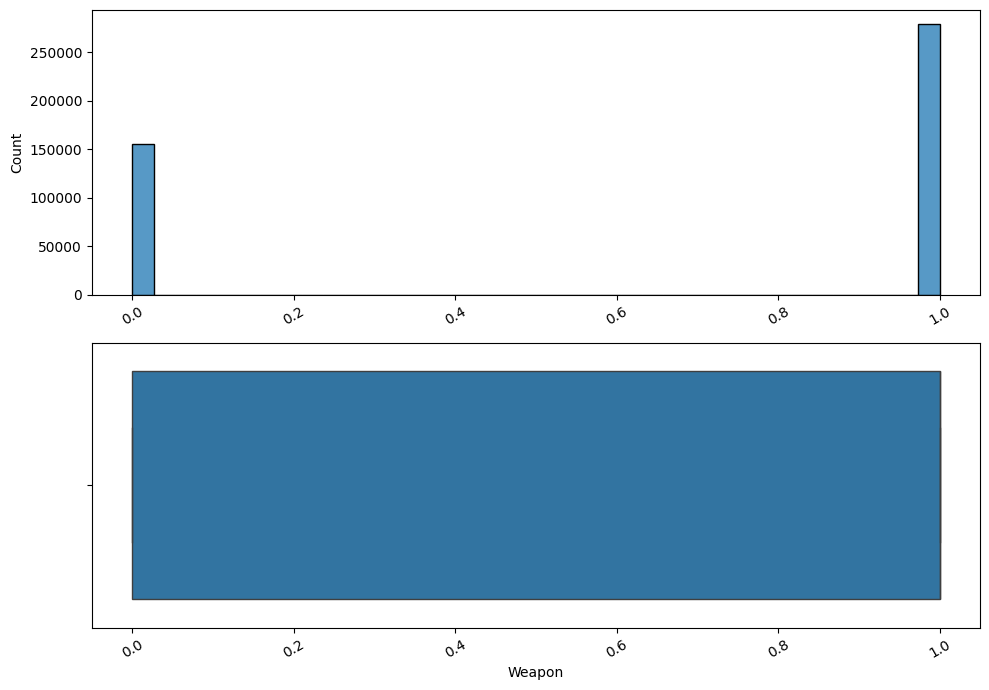

In [110]:
fig, axis = plt.subplots(2, figsize= (10, 7))

sns.histplot(ax = axis[0], data= total_data, x = "Weapon").set(xlabel= None)
sns.boxplot(ax = axis[1], data= total_data, x = "Weapon")

for ax in axis.flat:
    ax.tick_params(axis = "x", labelrotation = 30)

plt.tight_layout()

plt.show()

In [111]:
columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon', 'weekday'],
      dtype='object')

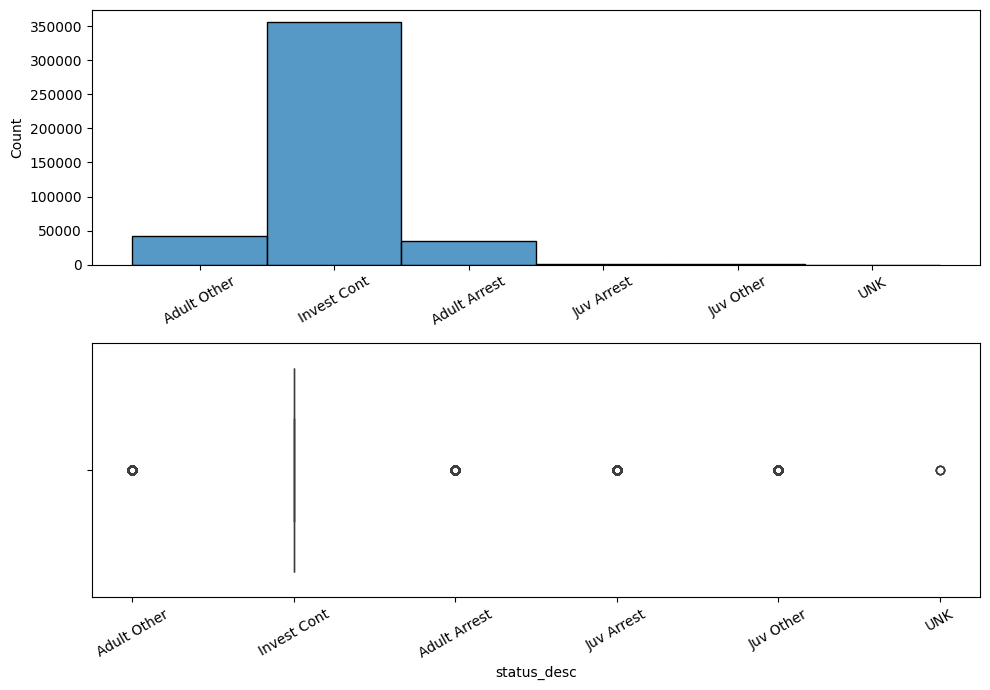

In [112]:
fig, axis = plt.subplots(2, figsize= (10, 7))

sns.histplot(ax = axis[0], data= total_data, x = "status_desc").set(xlabel= None)
sns.boxplot(ax = axis[1], data= total_data, x = "status_desc")

for ax in axis.flat:
    ax.tick_params(axis = "x", labelrotation = 30)

plt.tight_layout()

plt.show()

In [113]:
weapon_desc=total_data.value_counts("weapon_desc").head(20)
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82664
UNKNOWN WEAPON/OTHER WEAPON,17634
VERBAL THREAT,11308
HAND GUN,9781
KNIFE WITH BLADE 6INCHES OR LESS,3374
OTHER KNIFE,3173
SEMI-AUTOMATIC PISTOL,2983
UNKNOWN FIREARM,2918
MACE/PEPPER SPRAY,1940


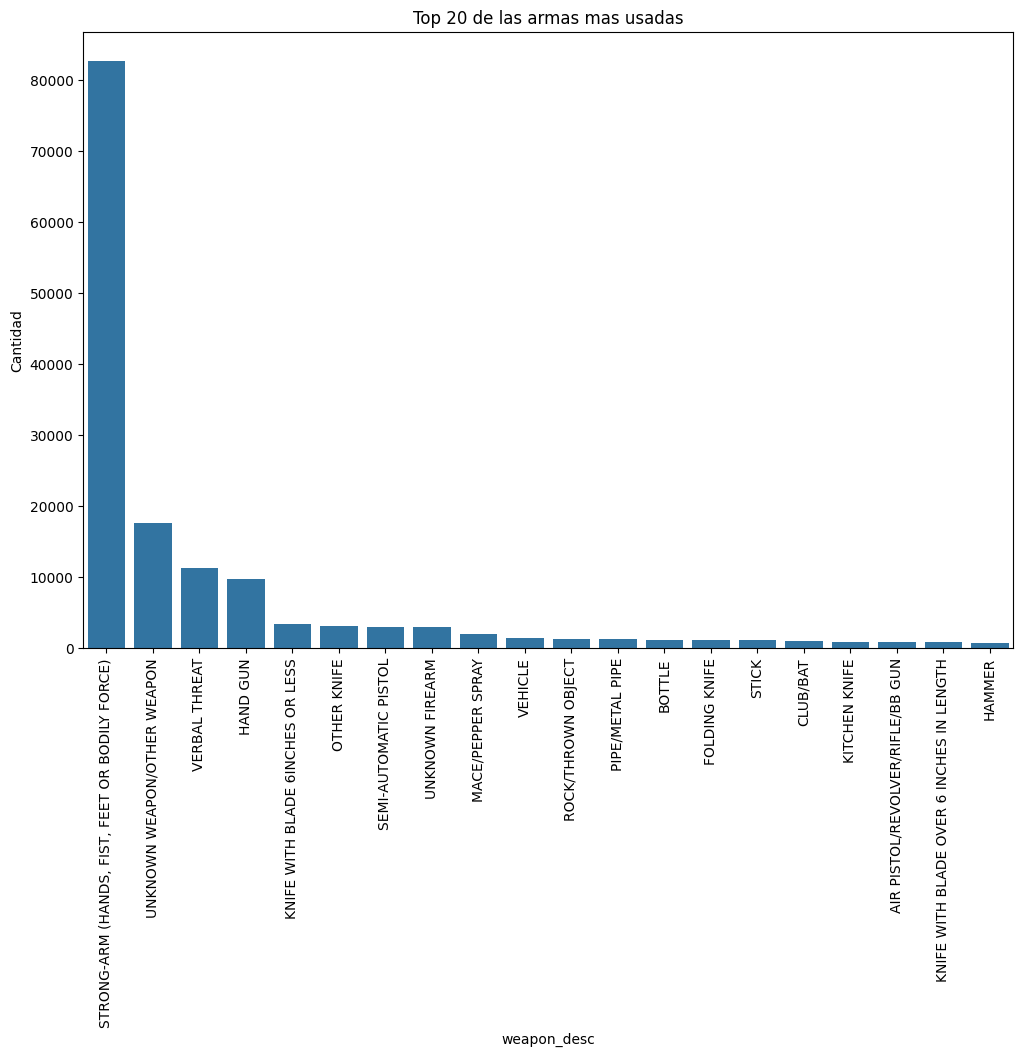

In [114]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('Top 20 de las armas mas usadas')

# Mostrar el gráfico
plt.show()

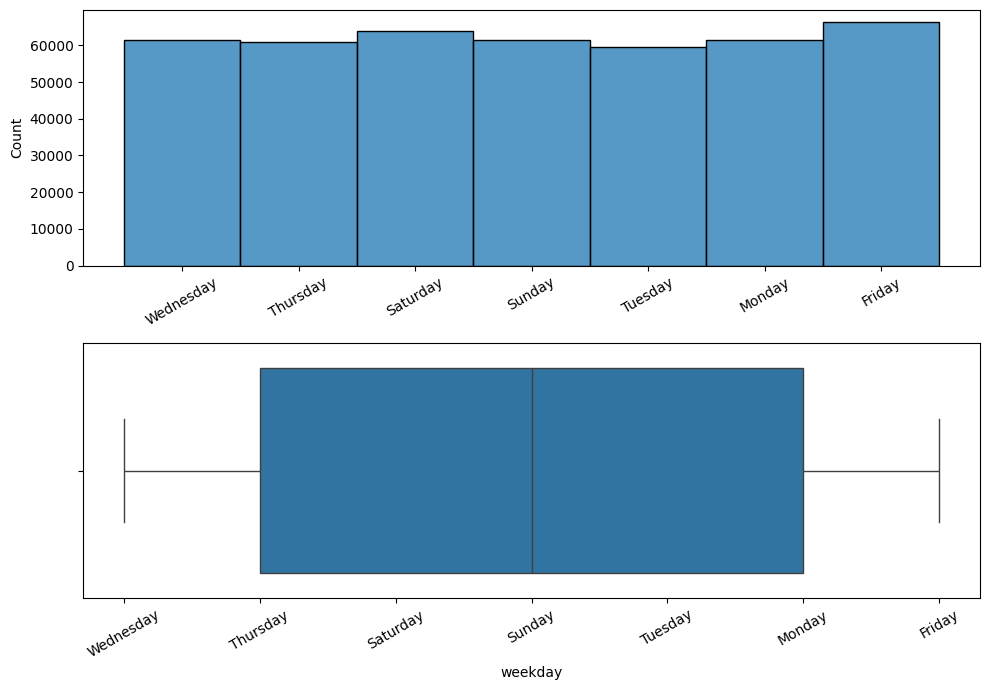

In [115]:
fig, axis = plt.subplots(2, figsize= (10, 7))

sns.histplot(ax = axis[0], data= total_data, x = "weekday").set(xlabel= None)
sns.boxplot(ax = axis[1], data= total_data, x = "weekday")

for ax in axis.flat:
    ax.tick_params(axis = "x", labelrotation = 30)

plt.tight_layout()

plt.show()

In [116]:
latitud=total_data.value_counts("lat").head(20)
latitud=pd.DataFrame(latitud)
latitud

,count
lat,
34.1016,2479
34.0980,1847
34.0473,1703
34.0561,1681
34.2012,1591
34.0460,1518
34.0467,1491
34.1939,1474
34.0483,1440


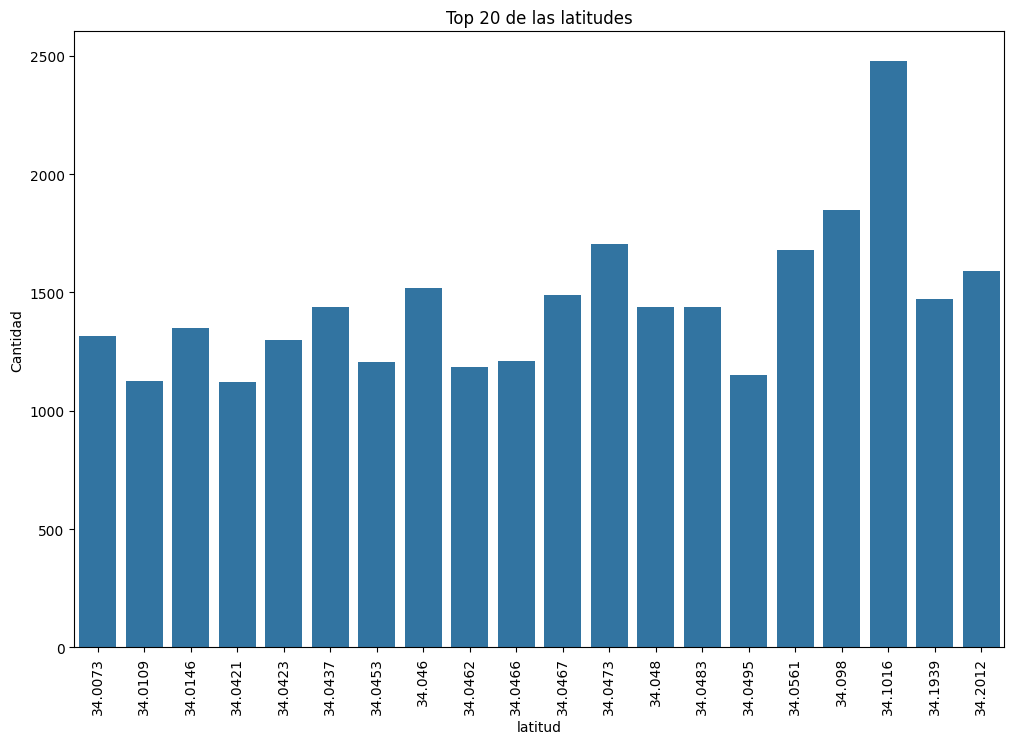

In [117]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=latitud.index, y=latitud['count'], data=latitud)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('latitud')
plt.ylabel('Cantidad')
plt.title('Top 20 de las latitudes')

# Mostrar el gráfico
plt.show()

In [118]:
longitud=total_data.value_counts("lon").head(20)
longitud=pd.DataFrame(longitud)
longitud

,count
lon,
-118.3089,2342
-118.2827,2128
-118.2739,2072
-118.2915,2060
-118.2375,1513
-118.2520,1489
-118.2631,1446
-118.3002,1326
-118.2814,1108


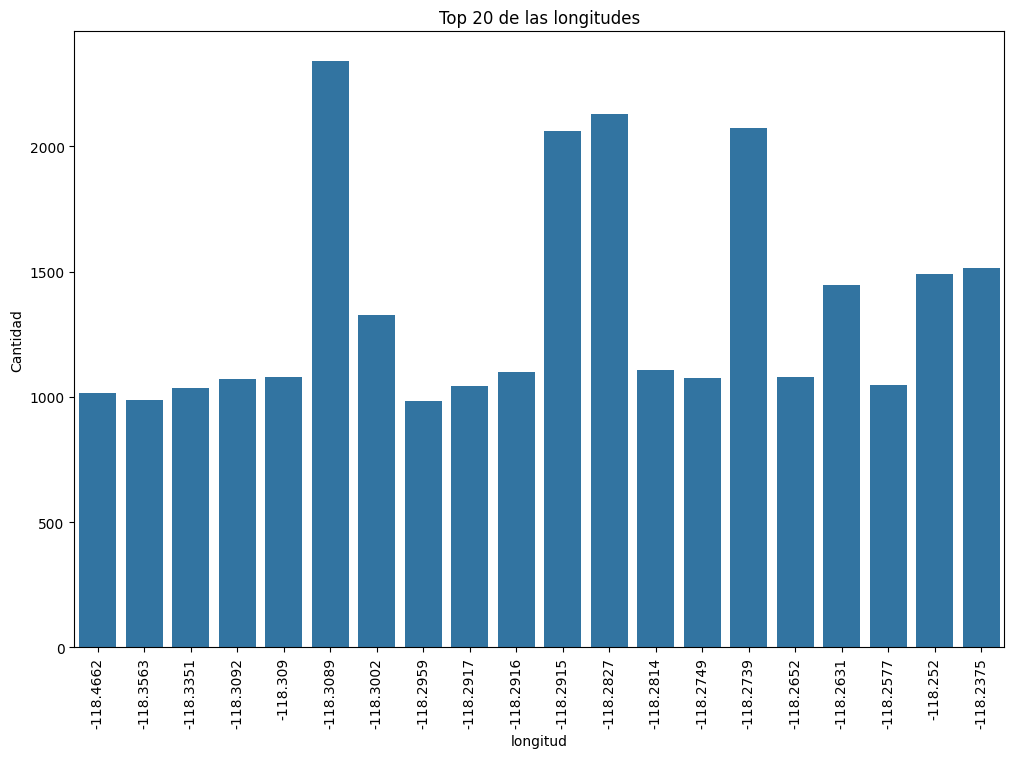

In [119]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=longitud.index, y=longitud['count'], data=longitud)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('longitud')
plt.ylabel('Cantidad')
plt.title('Top 20 de las longitudes')

# Mostrar el gráfico
plt.show()

In [120]:
ages = total_data["vict_age"].sort_values()
ages.head(20)

374621    0
474779    0
266107    0
266106    0
266103    0
266102    0
266098    0
527296    0
393216    0
266091    0
474776    0
266087    0
527299    0
393219    0
393221    0
266109    0
448412    0
448411    0
393224    0
266076    0
Name: vict_age, dtype: int64

In [121]:
ages=total_data.value_counts("vict_age")[0:20]
ages

vict_age
0     111210
30      9978
31      9593
29      9583
28      9294
32      9182
27      9179
33      9037
35      8998
22      8606
25      8605
26      8585
34      8489
24      8248
36      7886
37      7559
38      7397
23      7253
21      7218
39      6969
Name: count, dtype: int64

In [122]:
total_data['mocodes'] = total_data['mocodes'].astype(str)

In [123]:
total_data['mocodes'] = total_data['mocodes'].apply(lambda x: x.split(' '))

In [124]:
total_data['mocodes'].head()

0          [0444, 0913]
1    [0416, 1822, 1414]
2                [1501]
3          [0329, 1402]
4                [0329]
Name: mocodes, dtype: object

In [125]:
mocodes_df = pd.concat([total_data['mocodes'].apply(lambda x: pd.Series(x))], axis=1)

In [126]:
mocodes_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0444,0913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0416,1822,1414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0329,1402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
import PyPDF2

with open(r'..\data\raw\MO_CODES_Numerical_20191119.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    text = ''
    for page_num in range(len(reader.pages)):
        text += reader.pages[page_num].extract_text()

# Dividir el texto en líneas
lines = text.split('\n')

# Crear un DataFrame
df = pd.DataFrame({'Text': lines})

# Muestra las primeras filas del DataFrame
print(df.head())

                       Text
0                REV: 07/19
1  0100 Suspect Impersonate
2           0101 Aid victim
3                0102 Blind
4  0103 Physically disabled


In [128]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435089 entries, 0 to 764060
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      435089 non-null  datetime64[ns]
 1   time_occ      426554 non-null  object        
 2   area_name     435089 non-null  object        
 3   rpt_dist_no   435089 non-null  int64         
 4   crm_cd_desc   435089 non-null  object        
 5   mocodes       435089 non-null  object        
 6   vict_age      435089 non-null  int64         
 7   vict_sex      378199 non-null  object        
 8   vict_descent  378196 non-null  object        
 9   premis_desc   434803 non-null  object        
 10  weapon_desc   155279 non-null  object        
 11  status_desc   435089 non-null  object        
 12  location      435089 non-null  object        
 13  lat           435089 non-null  float64       
 14  lon           435089 non-null  float64       
 15  weekday       435089 n

In [136]:
total_data[total_data["vict_age"] == 0].head(10)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,Weapon
2,2020-02-13,12:00:00,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,[1501],0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474,Thursday,True
7,2020-01-04,04:00:00,Central,155,OTHER MISCELLANEOUS CRIME,"[1402, 0392]",0,X,X,POLICE FACILITY,NaN,Invest Cont,200 E 6TH ST,34.0448,-118.2474,Saturday,True
12,2020-01-07,16:38:00,Central,162,ARSON,"[1402, 1501, 2004]",0,X,X,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 W 7TH ST,34.0480,-118.2577,Tuesday,False
22,2020-09-03,20:00:00,Central,111,VEHICLE - STOLEN,[nan],0,NaN,NaN,GARAGE/CARPORT,NaN,Invest Cont,500 N FIGUEROA ST,34.0615,-118.2470,Thursday,True
24,2020-01-28,21:00:00,Central,181,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","[0329, 1300, 1822, 1414, 1420]",0,X,X,STREET,NaN,Invest Cont,11TH ST,34.0431,-118.2692,Tuesday,True
25,2020-01-29,19:30:00,Central,162,SHOPLIFTING - PETTY THEFT ($950 & UNDER),"[0344, 1414]",0,M,W,DEPARTMENT STORE,NaN,Invest Cont,700 W 7TH ST,34.0480,-118.2577,Wednesday,True
46,2020-01-01,09:05:00,Central,153,BATTERY POLICE (SIMPLE),"[2004, 1212, 0917, 0910, 1822, 0417, 2048]",0,X,X,MTA - RED LINE - PERSHING SQUARE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,500 S HILL ST,34.0488,-118.2518,Wednesday,False
47,2020-01-01,09:05:00,Central,153,BATTERY POLICE (SIMPLE),"[2004, 1212, 0917, 0910, 1822, 0417, 2048]",0,X,X,MTA - RED LINE - PERSHING SQUARE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,500 S HILL ST,34.0488,-118.2518,Wednesday,False
55,2020-01-01,23:15:00,Central,182,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"[1822, 0329, 0910]",0,X,X,"VEHICLE, PASSENGER/TRUCK",NaN,Invest Cont,9TH ST,34.0444,-118.2593,Wednesday,True
56,2020-01-02,05:45:00,Central,111,BURGLARY,"[1822, 1414, 0344, 1609]",0,X,X,RESTAURANT/FAST FOOD,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,800 N BROADWAY,34.0623,-118.2383,Thursday,False


In [146]:
total_data["crm_cd_desc"].value_counts()[20:40]

crm_cd_desc
BIKE - STOLEN                                               3564
LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                     3297
VIOLATION OF COURT ORDER                                    2997
OTHER MISCELLANEOUS CRIME                                   2995
BUNCO, GRAND THEFT                                          2727
SHOPLIFTING-GRAND THEFT ($950.01 & OVER)                    2534
ATTEMPTED ROBBERY                                           2355
THEFT, PERSON                                               2222
OTHER ASSAULT                                               2178
VEHICLE - ATTEMPT STOLEN                                    2107
BATTERY WITH SEXUAL CONTACT                                 1909
BURGLARY, ATTEMPTED                                         1813
PICKPOCKET                                                  1690
RAPE, FORCIBLE                                              1647
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                     1551
EMBEZZLEMENT,